<a href="https://colab.research.google.com/github/imation5212/Data-Exploratory-Analysis/blob/main/Data_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil import parser
from matplotlib import pyplot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller, kpss,grangercausalitytests
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
color_pal=sns.color_palette()

In [82]:
Kenya = pd.read_excel("Thesis_data.xlsx")
#Kenya_test = pd.read_excel("Energy_Load_Dataset.xlsx")
Kenya

,DateTime,MW,Holiday
0,2018-01-01 00:00:00,869.658417,True
1,2018-01-01 00:30:00,959.150417,True
2,2018-01-01 01:00:00,913.192417,True
3,2018-01-01 01:30:00,873.842417,True
4,2018-01-01 02:00:00,861.146417,True
...,...,...,...
87644,2022-12-31 22:00:00,1604.933954,False
87645,2022-12-31 22:30:00,1527.775954,False
87646,2022-12-31 23:00:00,1453.867954,False
87647,2022-12-31 23:30:00,1359.971954,False


In [83]:
Kenya = Kenya.set_index("DateTime")
Kenya.index = pd.to_datetime(Kenya.index)
Kenya = Kenya.asfreq('30min')

In [84]:
KenyaHourly = Kenya.resample('H').max() # Betwwen the mean() or max() methods,which best suits the code line.
KenyaHourly.head(5)

,MW,Holiday
DateTime,,
2018-01-01 00:00:00,959.150417,True
2018-01-01 01:00:00,913.192417,True
2018-01-01 02:00:00,861.146417,True
2018-01-01 03:00:00,829.476417,True
2018-01-01 04:00:00,804.144417,True


In [85]:
df=Kenya.head(1000)
df.shape
df

,MW,Holiday
DateTime,,
2018-01-01 00:00:00,869.658417,True
2018-01-01 00:30:00,959.150417,True
2018-01-01 01:00:00,913.192417,True
2018-01-01 01:30:00,873.842417,True
2018-01-01 02:00:00,861.146417,True
...,...,...
2018-01-21 17:30:00,1021.097233,False
2018-01-21 18:00:00,1065.151433,False
2018-01-21 18:30:00,1095.147333,False


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


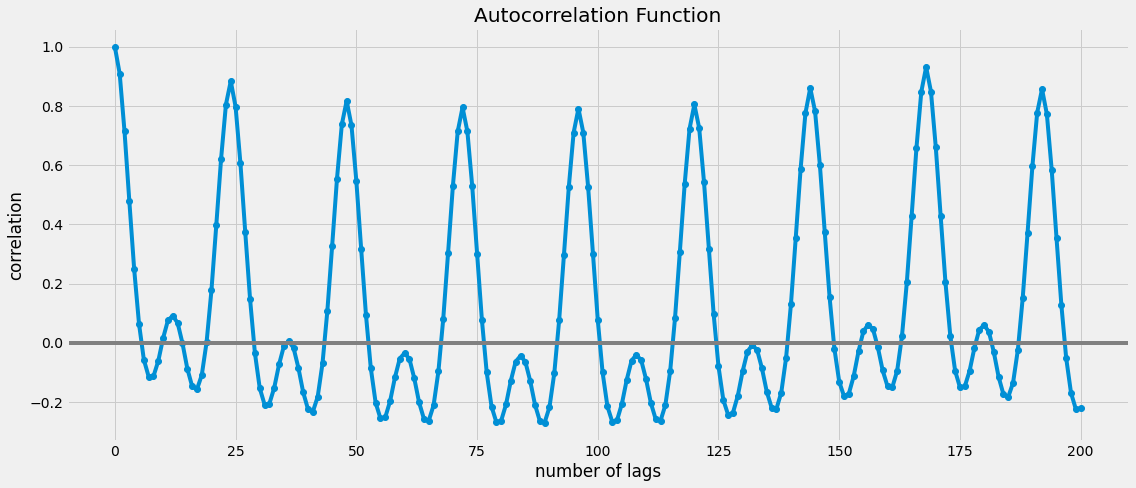

In [86]:
lag_acf = acf(KenyaHourly["MW"], nlags=200)
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='-',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

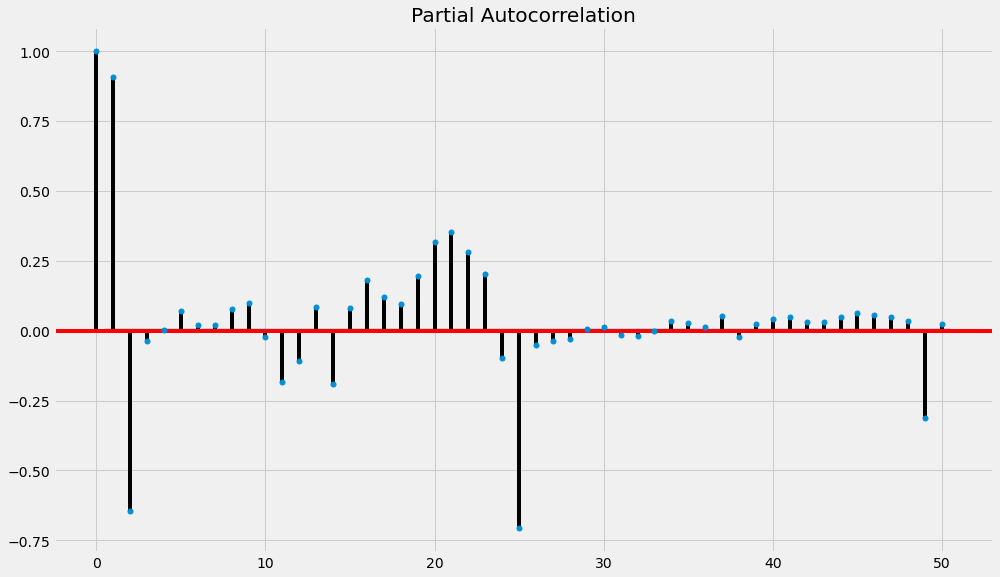

In [87]:
plot_pacf(KenyaHourly["MW"], lags=50, method='ywm')
pyplot.show()

Minimum Demand:  11.544291666666041
Maximum Demand:  2133.95


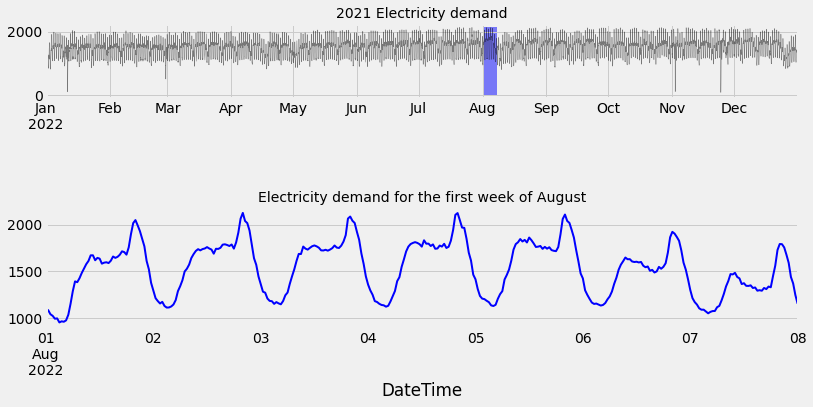

In [88]:
zoom_2021_data=('2022-01-01 00:00:00','2022-12-31 23:00:00')
zoom = ('2022-08-01 00:00:00','2022-08-08 00:00:00')

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)

main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:, :])

Kenya.loc[zoom_2021_data[0]:zoom_2021_data[1]].MW.plot(ax=main_ax, c='black', alpha=0.5, linewidth=0.5)
min_y = min(Kenya.MW)
print("Minimum Demand: ",min_y)
max_y = max(Kenya.MW)
print("Maximum Demand: ",max_y)
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')

Kenya.loc[zoom[0]: zoom[1]].MW.plot(ax=zoom_ax, color='blue', linewidth=2)

main_ax.set_title('2021 Electricity demand', fontsize=14)
zoom_ax.set_title('Electricity demand for the first week of August', fontsize=14)
plt.subplots_adjust(hspace=1)

In [89]:
def create_features(Kenya):
    """
    create time series features based on time series index.
    """
    Kenya["hour"] = Kenya.index.hour
    Kenya["dayofweek"] = Kenya.index.day_of_week
    Kenya["month"] = Kenya.index.month
    return Kenya
Kenya = create_features(Kenya)
Kenya.head(10)

,MW,Holiday,hour,dayofweek,month
DateTime,,,,,
2018-01-01 00:00:00,869.658417,True,0,0,1
2018-01-01 00:30:00,959.150417,True,0,0,1
2018-01-01 01:00:00,913.192417,True,1,0,1
2018-01-01 01:30:00,873.842417,True,1,0,1
2018-01-01 02:00:00,861.146417,True,2,0,1
2018-01-01 02:30:00,829.542417,True,2,0,1
2018-01-01 03:00:00,829.476417,True,3,0,1
2018-01-01 03:30:00,801.092417,True,3,0,1
2018-01-01 04:00:00,804.144417,True,4,0,1


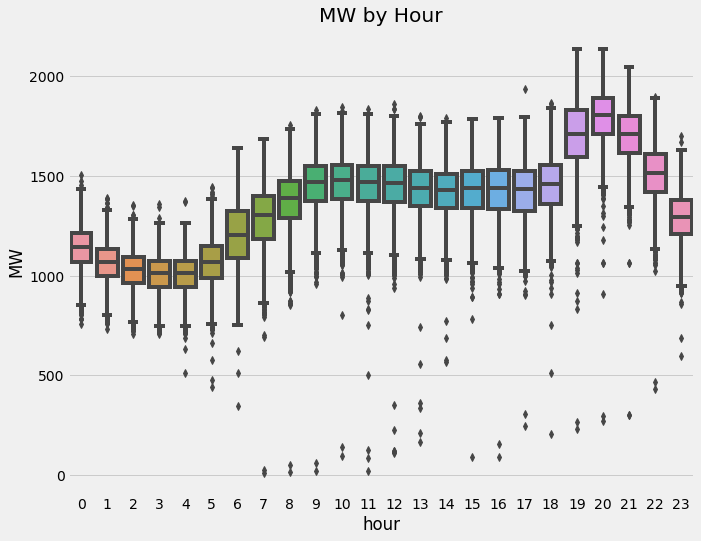

In [90]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=Kenya, x="hour", y= "MW")
ax.set_title("MW by Hour")
plt.show()

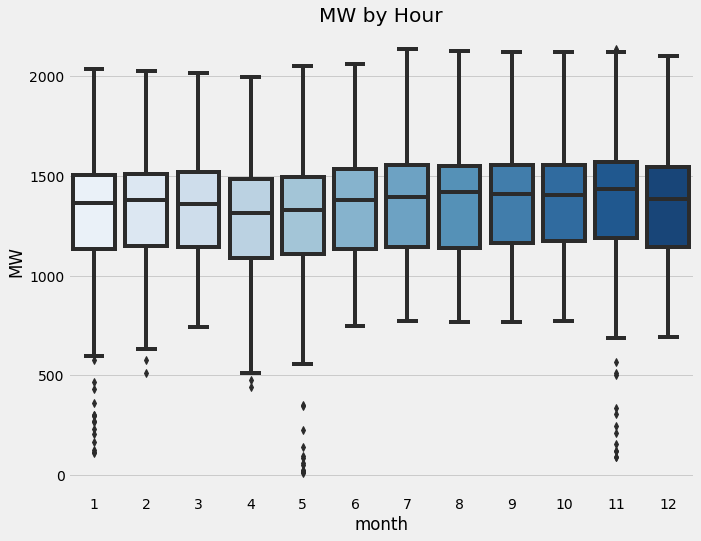

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=Kenya, x="month", 
y= "MW", palette= "Blues")
ax.set_title("MW by Hour")
plt.show()

In [92]:
#Multiplacative decomposition
Mult_result =seasonal_decompose(df["MW"], model="multiplicative",period=24)
#Additive decomposition
Add_result = seasonal_decompose(df["MW"], model="additive", period=24)

Text(0.5, 0.98, '\nMultiplicative Decomposition')

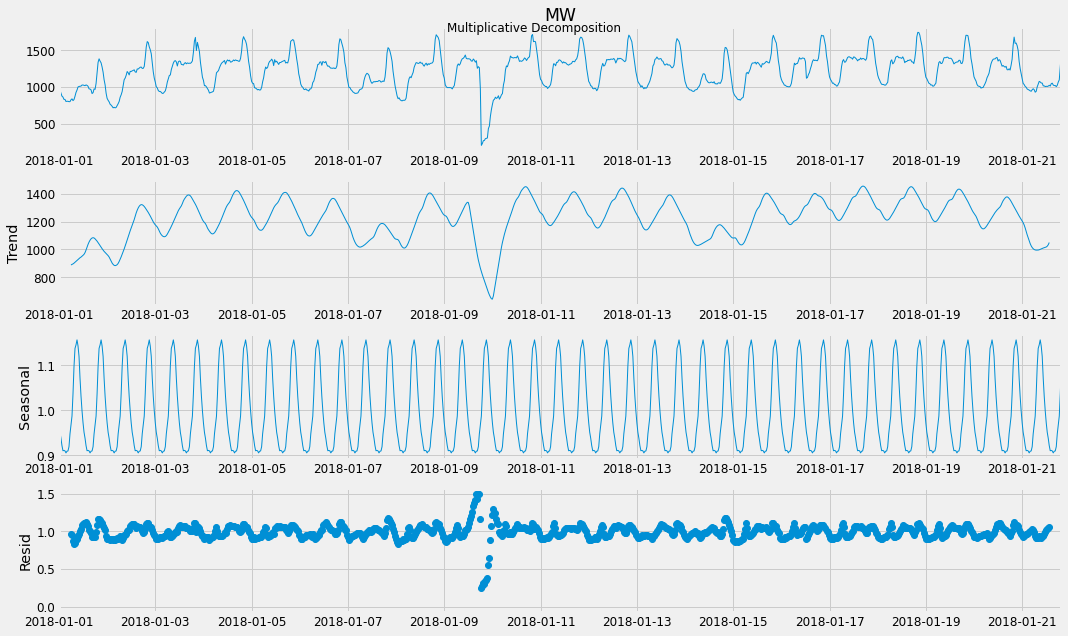

In [93]:
plt.rcParams.update({"figure.figsize": (15, 9),
"lines.linewidth": 1,
"font.weight": "light",
"font.size": 12,
"lines.color": "red",})
Mult_result.plot().suptitle("\nMultiplicative Decomposition", fontsize=12)

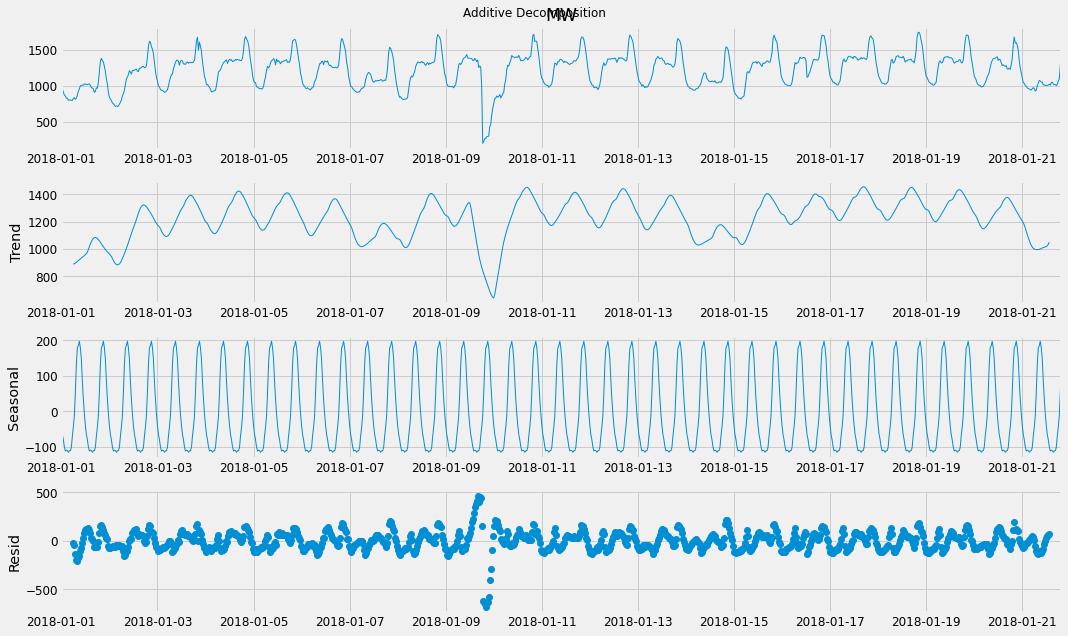

In [94]:
Add_result.plot().suptitle("Additive Decomposition", fontsize = 12)
plt.show()

In [95]:
new_df_add = pd.concat([Add_result.seasonal, Add_result.trend, Add_result.resid, Add_result.observed], axis=1)
new_df_add.columns = ["seasonality_AddResult", "trend_AddResult", "residual_AddResult", "Actual_values_AddResult"]
new_df_add.head(5)

,seasonality_AddResult,trend_AddResult,residual_AddResult,Actual_values_AddResult
DateTime,,,,
2018-01-01 00:00:00,-39.164830,NaN,NaN,869.658417
2018-01-01 00:30:00,-64.845619,NaN,NaN,959.150417
2018-01-01 01:00:00,-79.779979,NaN,NaN,913.192417
2018-01-01 01:30:00,-99.381707,NaN,NaN,873.842417
2018-01-01 02:00:00,-111.715347,NaN,NaN,861.146417


In [96]:
new_df_add = pd.concat([Mult_result.seasonal, Mult_result.trend, Mult_result.resid, Mult_result.observed], axis=1)
new_df_add.columns = ["seasonality_MultResult", "trend_MultResult", "residual_MultResult", "Actual_values_MultResult"]
new_df_add.head(5)

,seasonality_MultResult,trend_MultResult,residual_MultResult,Actual_values_MultResult
DateTime,,,,
2018-01-01 00:00:00,0.972407,NaN,NaN,869.658417
2018-01-01 00:30:00,0.951274,NaN,NaN,959.150417
2018-01-01 01:00:00,0.937953,NaN,NaN,913.192417
2018-01-01 01:30:00,0.921508,NaN,NaN,873.842417
2018-01-01 02:00:00,0.910151,NaN,NaN,861.146417


In [97]:
#ADF test for stationarity
#ADF test: Null hypothesis: The series is non-stationary. 
#Decision: If p-value < 0.05 reject the null hypothesis
adfuller_result =adfuller(KenyaHourly["MW"], autolag= "AIC")
print(f'ADF statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
print('Critical Values @ 0.05: %.2f' % adfuller_result[4]['5%'])

if adfuller_result[1] > 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')


ADF statistic: -19.09337316797297
p-value: 0.0
Critical Values @ 0.05: -2.86
Series is Stationary


In [98]:
!pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
kpss_test = kpss(KenyaHourly['MW'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

if kpss_test[1] > 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

KPSS Statistic: 32.822020
Critical Values @ 0.05: 0.46
p-value: 0.010000
Series is Stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [100]:
from tabulate import tabulate
#create data
#define header names
col_names = ["","Statistic", "Critical value @ 5%","P value","Conclusion"]
data = [["ADF statistic",adfuller_result[0],(adfuller_result[4]['5%']),adfuller_result[1],"Not Stationary" if adfuller_result[1]> 0.05 else "Stationary"],
        ["KPSS Statistic",kpss_test[0],(kpss_test[3]['5%']),kpss_test[1],kpss_test[1],"Not Stationary" if kpss_test[1]> 0.05 else "Stationary"]
        ]  
#display table
print(tabulate(data, headers=col_names,tablefmt="fancy_grid"))


╒════════════════╤═════════════╤═══════════════════════╤═══════════╤══════════════╕
│                │   Statistic │   Critical value @ 5% │   P value │ Conclusion   │
╞════════════════╪═════════════╪═══════════════════════╪═══════════╪══════════════╡
│ ADF statistic  │    -19.0934 │              -2.86161 │      0    │ Stationary   │
├────────────────┼─────────────┼───────────────────────┼───────────┼──────────────┤
│ KPSS Statistic │     32.822  │               0.463   │      0.01 │ 0.01         │
╘════════════════╧═════════════╧═══════════════════════╧═══════════╧══════════════╛


#***Granger Causality Test***
>>*Used to determine if one time series will be useful to forecast another.Based on the idea that if X causes Y , then the forecast of Y based on previous values of Y & prevoius values of X should outperform the forecast of Y based on pervoius values of Y alone.*

>>*Null hypothesis:X predictor series does not Granger cause the Y series*

In [101]:
grangercausalitytests(Kenya[['MW','Holiday']],maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=36.0688 , p=0.0000  , df_denom=87645, df_num=1
ssr based chi2 test:   chi2=36.0700 , p=0.0000  , df=1
likelihood ratio test: chi2=36.0626 , p=0.0000  , df=1
parameter F test:         F=36.0688 , p=0.0000  , df_denom=87645, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=61.2467 , p=0.0000  , df_denom=87642, df_num=2
ssr based chi2 test:   chi2=122.5004, p=0.0000  , df=2
likelihood ratio test: chi2=122.4149, p=0.0000  , df=2
parameter F test:         F=61.2467 , p=0.0000  , df_denom=87642, df_num=2


{1: ({'ssr_ftest': (36.06877509452092, 1.912215059171127e-09, 87645.0, 1),
   'ssr_chi2test': (36.0700096923335, 1.90354030010617e-09, 1),
   'lrtest': (36.06258973525837, 1.9108024206630135e-09, 1),
   'params_ftest': (36.06877509453359, 1.9122150591552916e-09, 87645.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (61.24671710109105, 2.6269973843527382e-27, 87642.0, 2),
   'ssr_chi2test': (122.50042248600732, 2.5082524305254954e-27, 2),
   'lrtest': (122.4148953963304, 2.617840686945332e-27, 2),
   'params_ftest': (61.24671710107042, 2.6269973844160157e-27, 87642.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [105]:
grangercausalitytests(Kenya[['MW','month']],maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.0311  , p=0.0080  , df_denom=87645, df_num=1
ssr based chi2 test:   chi2=7.0314  , p=0.0080  , df=1
likelihood ratio test: chi2=7.0311  , p=0.0080  , df=1
parameter F test:         F=7.0311  , p=0.0080  , df_denom=87645, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.7033 , p=0.0000  , df_denom=87642, df_num=2
ssr based chi2 test:   chi2=37.4088 , p=0.0000  , df=2
likelihood ratio test: chi2=37.4008 , p=0.0000  , df=2
parameter F test:         F=18.7033 , p=0.0000  , df_denom=87642, df_num=2


{1: ({'ssr_ftest': (7.031134515600742, 0.008011899896383423, 87645.0, 1),
   'ssr_chi2test': (7.03137518424752, 0.00800938242865658, 1),
   'lrtest': (7.031093160621822, 0.008010643868881697, 1),
   'params_ftest': (7.031134515617507, 0.00801189989630593, 87645.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (18.70333227060795, 7.567962185036796e-09, 87642.0, 2),
   'ssr_chi2test': (37.40879860162878, 7.529785355290558e-09, 2),
   'lrtest': (37.400817608926445, 7.559892968483262e-09, 2),
   'params_ftest': (18.70333227056372, 7.567962185366402e-09, 87642.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [102]:
Kenya

,MW,Holiday,hour,dayofweek,month
DateTime,,,,,
2018-01-01 00:00:00,869.658417,True,0,0,1
2018-01-01 00:30:00,959.150417,True,0,0,1
2018-01-01 01:00:00,913.192417,True,1,0,1
2018-01-01 01:30:00,873.842417,True,1,0,1
2018-01-01 02:00:00,861.146417,True,2,0,1
...,...,...,...,...,...
2022-12-31 22:00:00,1604.933954,False,22,5,12
2022-12-31 22:30:00,1527.775954,False,22,5,12
2022-12-31 23:00:00,1453.867954,False,23,5,12


## **Website link to formula expalnation:** 
> ### *https://towardsdatascience.com/moving-averages-in-python-16170e20f6c*

#***Average Method for Smoothing Time Series data***

##**Simple Moving Average**

In [106]:
# The simple moving average over a period of 24hours
Kenya['SMA_24'] = Kenya.MW.rolling(24, min_periods=1).mean()

# The simple moving average over a period of 1month / 720 hours
Kenya['SMA_month'] = Kenya.MW.rolling(720, min_periods=1).mean()

In [107]:
Kenya.head()

,MW,Holiday,hour,dayofweek,month,SMA_24,SMA_month
DateTime,,,,,,,
2018-01-01 00:00:00,869.658417,True,0,0,1,869.658417,869.658417
2018-01-01 00:30:00,959.150417,True,0,0,1,914.404417,914.404417
2018-01-01 01:00:00,913.192417,True,1,0,1,914.000417,914.000417
2018-01-01 01:30:00,873.842417,True,1,0,1,903.960917,903.960917
2018-01-01 02:00:00,861.146417,True,2,0,1,895.398017,895.398017


In [109]:
Kenya.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87649 entries, 2018-01-01 00:00:00 to 2023-01-01 00:00:00
Freq: 30T
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MW         87649 non-null  float64
 1   Holiday    87649 non-null  bool   
 2   hour       87649 non-null  int64  
 3   dayofweek  87649 non-null  int64  
 4   month      87649 non-null  int64  
 5   SMA_24     87649 non-null  float64
 6   SMA_month  87649 non-null  float64
dtypes: bool(1), float64(3), int64(3)
memory usage: 6.8 MB


Text(0, 0.5, 'MW')

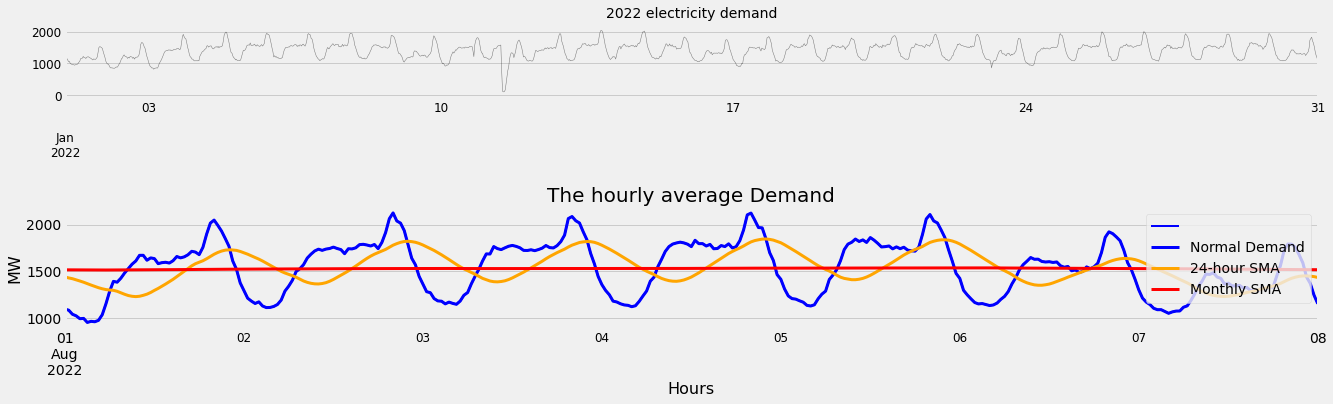

In [120]:
magnify=('2022-01-01 00:00:00','2022-01-31 00:00:00')
# colors for the line plot
colors = ['grey','green', 'red', 'purple']


fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)

main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:, :])

Kenya.loc[magnify[0]:magnify[1]].MW.plot(ax=main_ax, c='black', alpha=0.5, linewidth=0.5)
min_y = min(Kenya.MW)
max_y = max(Kenya.MW)
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')

Kenya.loc[zoom[0]: zoom[1]].MW.plot(ax=zoom_ax, color='blue', linewidth=2)

main_ax.set_title('2022 electricity demand', fontsize=14)
zoom_ax.set_title('Electricity demand for April', fontsize=14)
plt.subplots_adjust(hspace=1)





# line plot - the yearly average air temperature in Barcelona
Kenya.loc[zoom[0]: zoom[1]].MW.plot(color="blue", linewidth=3, figsize=(20,6))
Kenya.loc[zoom[0]: zoom[1]].SMA_24.plot(color="orange", linewidth=3, figsize=(20,6))
Kenya.loc[zoom[0]: zoom[1]].SMA_month.plot(color="red", linewidth=3, figsize=(20,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =["",'Normal Demand', '24-hour SMA','Monthly SMA'], fontsize=14)

# title and labels
plt.title('The hourly average Demand', fontsize=20)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('MW', fontsize=16)

##**Cumulative Moving Average**
> The Cumulative Moving Average is the ***unweighted mean*** of the previous values up to the current time t.

> The simple moving average has a sliding window of constant size M. On the contrary, the window size becomes larger as the time passes when computing the cumulative moving average.

> We can compute the cumulative moving average in Python using the pandas.Series.expanding method. This method gives us the cumulative value of our aggregation function (in this case the mean). As before, we can specify the minimum number of observations that are needed to return a value with the parameter min_periods (the default value being 1).
>>*The cumulative moving average takes into account all the preceding values when calculating the average. For this reason, they are a bad option to analyze trends, especially with long time series. The simple moving average works better for this purpose. However, all data points are equally weighted. To highlight recent observations, we can use the exponential moving average which applies more weight to the most recent data points, reacting faster to changes.*



In [124]:
# cumulative moving average
# ambient air temperature
Kenya['CMA'] = Kenya.MW.expanding().mean()
Kenya

,MW,Holiday,hour,dayofweek,month,SMA_24,SMA_month,CMA
DateTime,,,,,,,,
2018-01-01 00:00:00,869.658417,True,0,0,1,869.658417,869.658417,869.658417
2018-01-01 00:30:00,959.150417,True,0,0,1,914.404417,914.404417,914.404417
2018-01-01 01:00:00,913.192417,True,1,0,1,914.000417,914.000417,914.000417
2018-01-01 01:30:00,873.842417,True,1,0,1,903.960917,903.960917,903.960917
2018-01-01 02:00:00,861.146417,True,2,0,1,895.398017,895.398017,895.398017
...,...,...,...,...,...,...,...,...
2022-12-31 22:00:00,1604.933954,False,22,5,12,1486.670763,1400.020369,1354.454816
2022-12-31 22:30:00,1527.775954,False,22,5,12,1492.226691,1399.885619,1354.456794
2022-12-31 23:00:00,1453.867954,False,23,5,12,1494.097788,1399.793265,1354.457928


Text(0, 0.5, 'Demand(MW)')

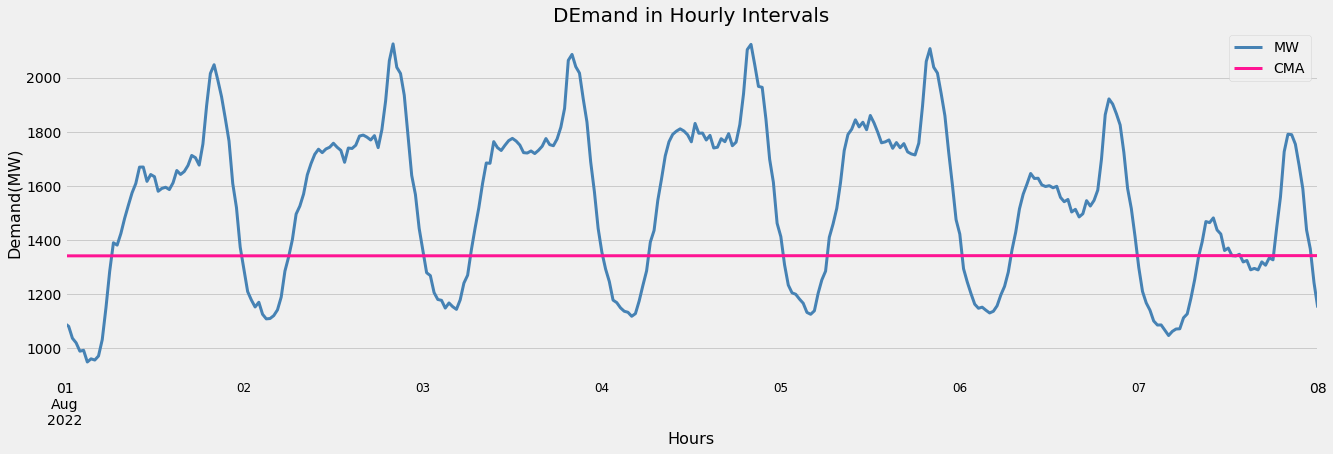

In [126]:
# colors for the line plot
colors = ['steelblue', 'deeppink']

# line plot - the yearly accumulated rainfall in Barcelona
Kenya.loc[zoom[0]: zoom[1]][['MW','CMA']].plot(color=colors, linewidth=3, figsize=(20,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['MW', 'CMA'], fontsize=14)

# title and labels
plt.title('DEmand in Hourly Intervals', fontsize=20)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Demand(MW)', fontsize=16)

 # **Exponential Moving average**
 > *The exponential moving average is a widely used method to filter out noise and identify trends. The weight of each element decreases progressively over time, meaning the exponential moving average gives greater weight to recent data points. This is done under the idea that recent data is more relevant than old data. Compared to the simple moving average, the exponential moving average reacts faster to changes, since is more sensitive to recent movements.*



In [127]:
# exponential moving average
# smoothing factor - 0.05
Kenya['EMA_0.05'] = Kenya.MW.ewm(alpha=0.05, adjust=False).mean()

# smoothing factor - 0.3
Kenya['EMA_0.3'] = Kenya.MW.ewm(alpha=0.3, adjust=False).mean()
Kenya

,MW,Holiday,hour,dayofweek,month,SMA_24,SMA_month,CMA,EMA_0.05,EMA_0.3
DateTime,,,,,,,,,,
2018-01-01 00:00:00,869.658417,True,0,0,1,869.658417,869.658417,869.658417,869.658417,869.658417
2018-01-01 00:30:00,959.150417,True,0,0,1,914.404417,914.404417,914.404417,874.133017,896.506017
2018-01-01 01:00:00,913.192417,True,1,0,1,914.000417,914.000417,914.000417,876.085987,901.511937
2018-01-01 01:30:00,873.842417,True,1,0,1,903.960917,903.960917,903.960917,875.973808,893.211081
2018-01-01 02:00:00,861.146417,True,2,0,1,895.398017,895.398017,895.398017,875.232439,883.591681
...,...,...,...,...,...,...,...,...,...,...
2022-12-31 22:00:00,1604.933954,False,22,5,12,1486.670763,1400.020369,1354.454816,1466.321200,1675.325619
2022-12-31 22:30:00,1527.775954,False,22,5,12,1492.226691,1399.885619,1354.456794,1469.393937,1631.060720
2022-12-31 23:00:00,1453.867954,False,23,5,12,1494.097788,1399.793265,1354.457928,1468.617638,1577.902890


Text(0.5, 0, 'Demand (MW)')

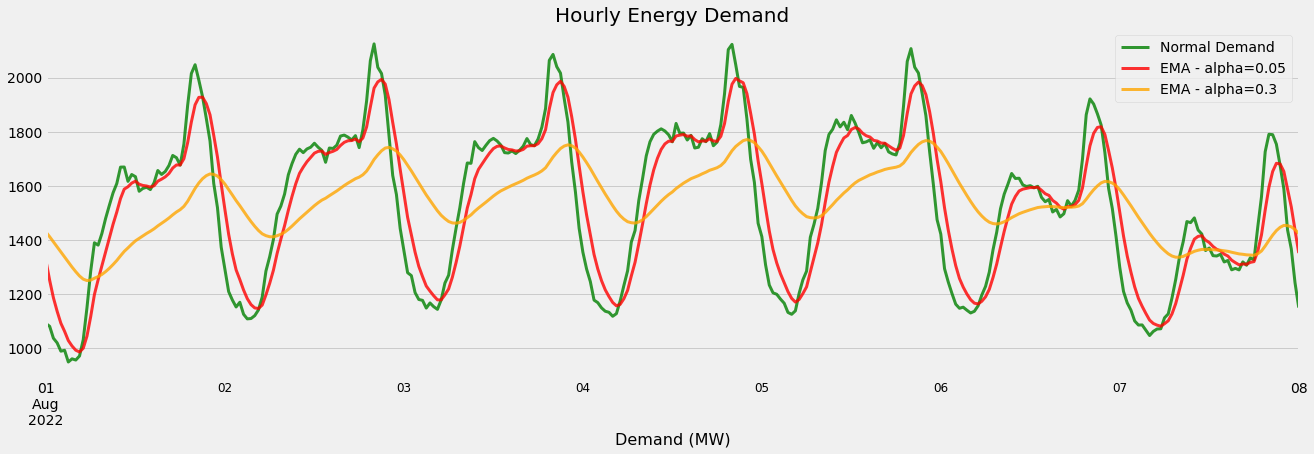

In [129]:
# colors for the line plot
colors = ['green', 'red', 'orange']

# line plot - the yearly average air temperature in Barcelona
Kenya.loc[zoom[0]: zoom[1]][['MW', 'EMA_0.3', 'EMA_0.05']].plot(color=colors, linewidth=3, figsize=(20,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Normal Demand', 'EMA - alpha=0.05', 'EMA - alpha=0.3'], fontsize=14)

# title and labels
plt.title('Hourly Energy Demand', fontsize=20)
plt.xlabel('Demand (MW)', fontsize=16)